## Step 1: Interpolation

##### This step involves normalizing taxi trajectories' length into a 50-coordinate space (x, y), corresponding to an average trip length of 13 minutes. This technique mitigates bias introduced by trajectory length during dimension reduction and clustering. 

### 0- Importations 

In [1]:
import numpy as np
import pandas as pd

from src.df_processing import * 

### 1- Initialization

In [2]:
### DATASET ###

# Load dataset
df = pd.read_csv('../taxi+service+trajectory+prediction+challenge+ecml+pkdd+2015/train.csv')

# Drop missing values 
df.dropna()

# Create dataframe with parameters of interest: TRIP_ID; POLYLINE
trips = df[['TRIP_ID', 'POLYLINE']]

In [3]:
### INTERPOLATION PARAMETERS ###

# Number of trajectories to interpolate 
nb_points = 200

# New coordinates dimension for interpolation
new_dim=50 # Corresponding to average trip 13 min

### 2- Data pre-processing

In [4]:
# Extract predefined number of trajectories
ls = extract_traj(trips.iloc[0:nb_points])

# Select trajectories with more than two coordinate points
mask = [len(i)>2 for i in ls] 
selected_elements = [x for i, x in enumerate(ls) if mask[i]] # list of selected trajectories
print("Number of trajectories before selection: ", nb_points)
print("Number of trajectories after selection: ", len(selected_elements))

Number of trajectories before selection:  200
Number of trajectories after selection:  195


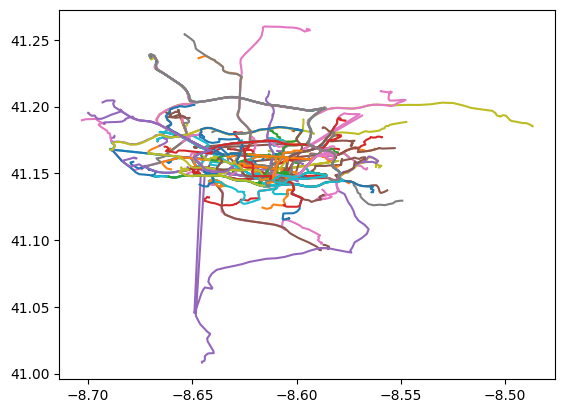

In [5]:
# Plot of trajectories 
plot_trajectories_list(selected_elements)

### 3- Perform interpolation

In [6]:
newls = interpolation(selected_elements, new_dim)

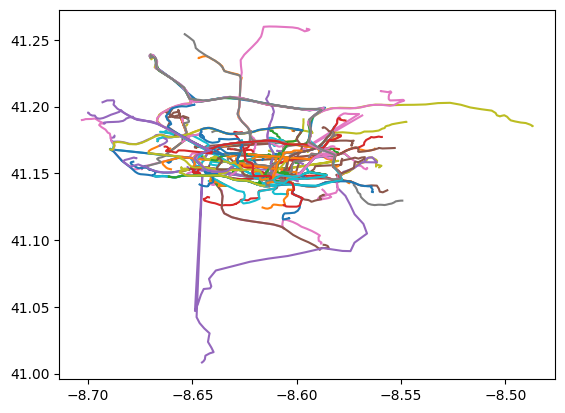

In [7]:
# Plot interpolated trajectories
plot_trajectories_list(newls)

### 4- Save interpolation results

In [8]:
new_df(trips, nb_points, mask, newls)

ok
